In [1]:
# Import pandas for data handling
import pandas as pd

# Load the dataset
df = pd.read_csv("Car details v3.csv")

# Display the first 5 rows to see the data
print("First 5 rows of dataset:")
display(df.head())

# Show basic info about columns, data types, and non-null counts
print("\nDataset Info:")
df.info()

# Show dataset shape: number of rows and columns
print("\nDataset shape (rows, columns):", df.shape)

First 5 rows of dataset:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB

Dataset shape (rows, columns): (8128, 13)


In [2]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


In [3]:
print("\nUnique values for mileage column:")
print(df['mileage'].unique()[:20])  # first 20 unique values

print("\nUnique values for engine column:")
print(df['engine'].unique()[:20])

print("\nUnique values for max_power column:")
print(df['max_power'].unique()[:20])

print("\nUnique values for torque column:")
print(df['torque'].unique()[:20])


Unique values for mileage column:
['23.4 kmpl' '21.14 kmpl' '17.7 kmpl' '23.0 kmpl' '16.1 kmpl' '20.14 kmpl'
 '17.3 km/kg' '23.59 kmpl' '20.0 kmpl' '19.01 kmpl' '17.3 kmpl'
 '19.3 kmpl' nan '18.9 kmpl' '18.15 kmpl' '24.52 kmpl' '19.7 kmpl'
 '22.54 kmpl' '21.0 kmpl' '25.5 kmpl']

Unique values for engine column:
['1248 CC' '1498 CC' '1497 CC' '1396 CC' '1298 CC' '1197 CC' '1061 CC'
 '796 CC' '1364 CC' '1399 CC' '1461 CC' '993 CC' nan '1198 CC' '1199 CC'
 '998 CC' '1591 CC' '2179 CC' '1368 CC' '2982 CC']

Unique values for max_power column:
['74 bhp' '103.52 bhp' '78 bhp' '90 bhp' '88.2 bhp' '81.86 bhp' '57.5 bhp'
 '37 bhp' '67.1 bhp' '68.1 bhp' '108.45 bhp' '60 bhp' '73.9 bhp' nan
 '67 bhp' '82 bhp' '88.5 bhp' '46.3 bhp' '88.73 bhp' '64.1 bhp']

Unique values for torque column:
['190Nm@ 2000rpm' '250Nm@ 1500-2500rpm' '12.7@ 2,700(kgm@ rpm)'
 '22.4 kgm at 1750-2750rpm' '11.5@ 4,500(kgm@ rpm)' '113.75nm@ 4000rpm'
 '7.8@ 4,500(kgm@ rpm)' '59Nm@ 2500rpm' '170Nm@ 1800-2400rpm'
 '160Nm@ 2000

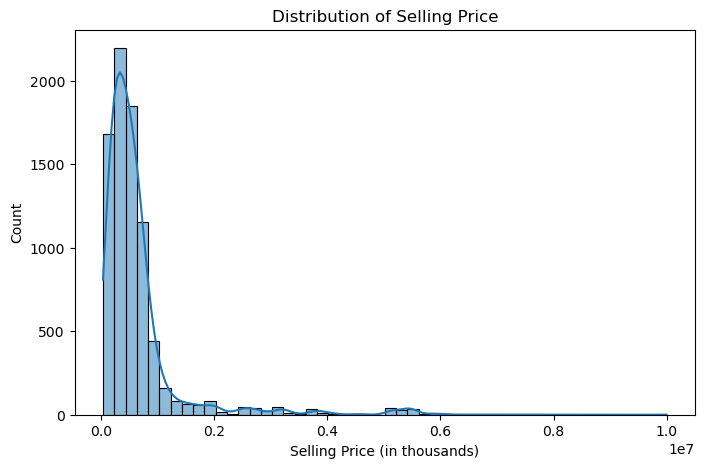

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], bins=50, kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price (in thousands)')
plt.show()

In [5]:
# Remove rows with missing values in these columns to keep it simple for now
df_clean = df.dropna(subset=['mileage', 'engine', 'max_power', 'torque', 'seats']).copy()

# Clean 'mileage' column: extract numeric part (before space) and convert to float
df_clean['mileage'] = df_clean['mileage'].str.split(' ').str[0].astype(float)

# Clean 'engine' column: extract number before ' CC' and convert to int
df_clean['engine'] = df_clean['engine'].str.split(' ').str[0].astype(int)

# Clean 'max_power' column: extract numeric part before ' bhp' and convert to float
df_clean['max_power'] = df_clean['max_power'].str.split(' ').str[0].astype(float)

# Check the result
df_clean[['mileage', 'engine', 'max_power']].head()

,mileage,engine,max_power
0,23.40,1248,74.00
1,21.14,1498,103.52
2,17.70,1497,78.00
3,23.00,1396,90.00
4,16.10,1298,88.20


In [6]:
import re

def extract_torque(val):
    try:
        # Find the first number (integer or float) using regex
        number = re.findall(r'\d+\.\d+|\d+', val)
        return float(number[0]) if number else None
    except:
        return None

df_clean['torque_extracted'] = df_clean['torque'].apply(extract_torque)

# Check sample output
df_clean[['torque', 'torque_extracted']].head(10)

,torque,torque_extracted
0,190Nm@ 2000rpm,190.00
1,250Nm@ 1500-2500rpm,250.00
2,"12.7@ 2,700(kgm@ rpm)",12.70
3,22.4 kgm at 1750-2750rpm,22.40
4,"11.5@ 4,500(kgm@ rpm)",11.50
5,113.75nm@ 4000rpm,113.75
6,"7.8@ 4,500(kgm@ rpm)",7.80
7,59Nm@ 2500rpm,59.00
8,170Nm@ 1800-2400rpm,170.00
9,160Nm@ 2000rpm,160.00


In [7]:
print("Total rows:", len(df_clean))
print("Successfully extracted torque values:", df_clean['torque_extracted'].notnull().sum())

Total rows: 7906
Successfully extracted torque values: 7906


In [8]:
# Drop original 'torque' column
df_clean.drop(columns=['torque'], inplace=True)

# Rename cleaned column
df_clean.rename(columns={'torque_extracted': 'torque'}, inplace=True)

# Confirm changes
df_clean.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,190.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,250.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,12.7
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,22.4
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,11.5


In [9]:
print("Fuel types:", df_clean['fuel'].unique())
print("Seller types:", df_clean['seller_type'].unique())
print("Transmission types:", df_clean['transmission'].unique())
print("Owner types:", df_clean['owner'].unique())

Fuel types: ['Diesel' 'Petrol' 'LPG' 'CNG']
Seller types: ['Individual' 'Dealer' 'Trustmark Dealer']
Transmission types: ['Manual' 'Automatic']
Owner types: ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [10]:
df_clean['transmission'] = df_clean['transmission'].map({'Manual': 0, 'Automatic': 1})

In [11]:
df_encoded = pd.get_dummies(df_clean, columns=['fuel', 'seller_type', 'owner'], drop_first=True)


In [12]:
print("Final dataset shape:", df_encoded.shape)
df_encoded.head()


Final dataset shape: (7906, 19)


,name,year,selling_price,km_driven,transmission,mileage,engine,max_power,seats,torque,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,0,23.40,1248,74.00,5.0,190.0,True,False,False,True,False,False,False,False,False
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,21.14,1498,103.52,5.0,250.0,True,False,False,True,False,False,True,False,False
2,Honda City 2017-2020 EXi,2006,158000,140000,0,17.70,1497,78.00,5.0,12.7,False,False,True,True,False,False,False,False,True
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,23.00,1396,90.00,5.0,22.4,True,False,False,True,False,False,False,False,False
4,Maruti Swift VXI BSIII,2007,130000,120000,0,16.10,1298,88.20,5.0,11.5,False,False,True,True,False,False,False,False,False


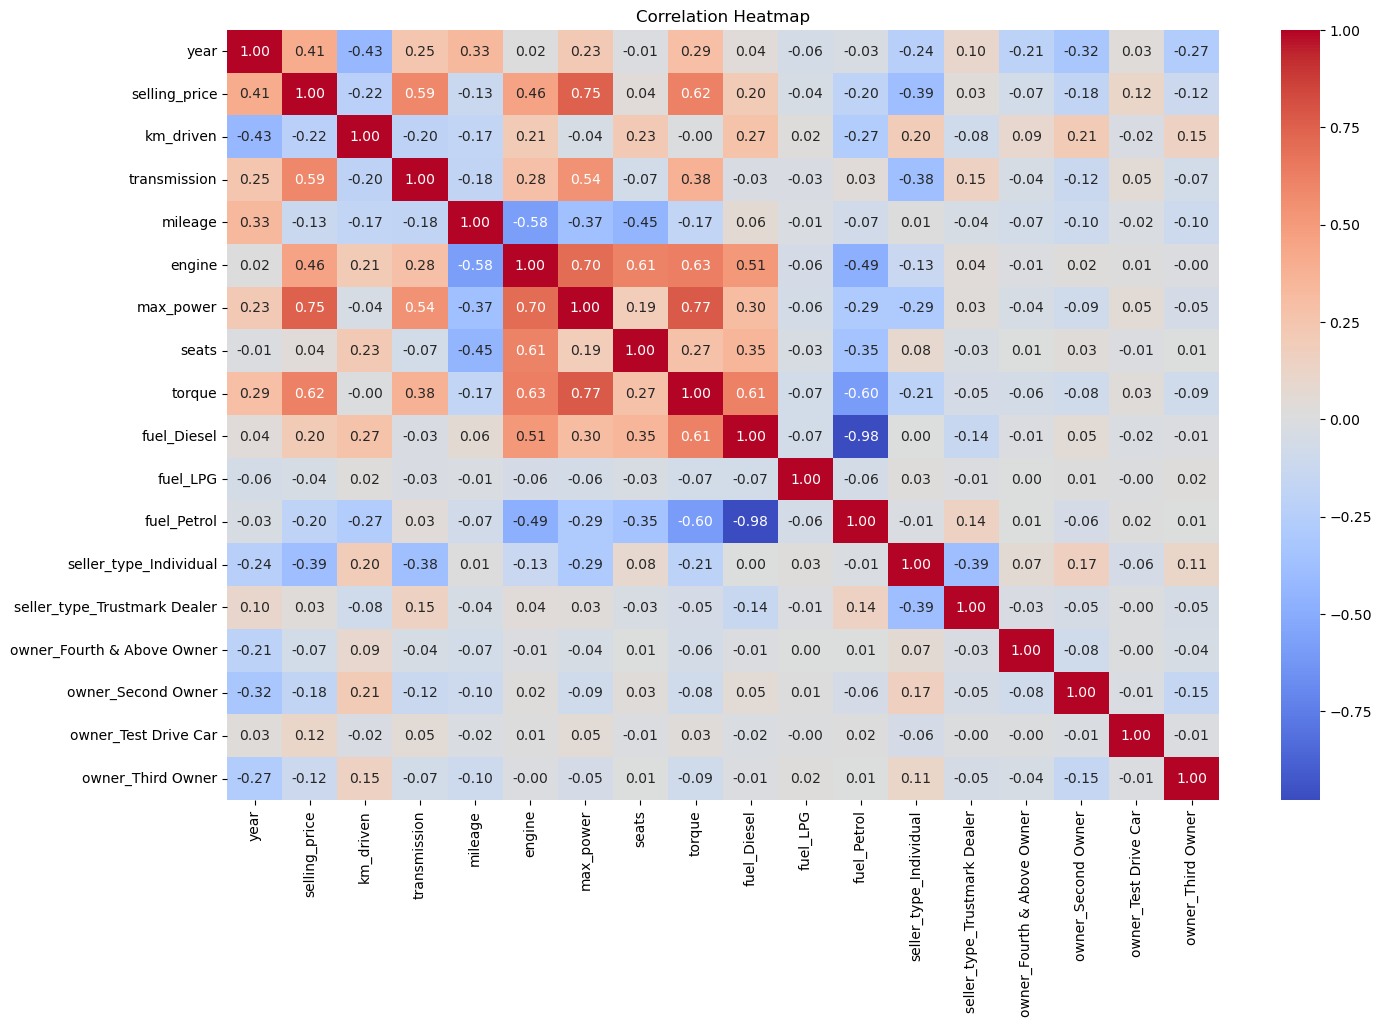

In [14]:
# Drop 'name' column since it's text and can't be used in correlation
df_corr = df_encoded.drop(columns=['name'])

# Now calculate correlation
plt.figure(figsize=(16, 10))
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

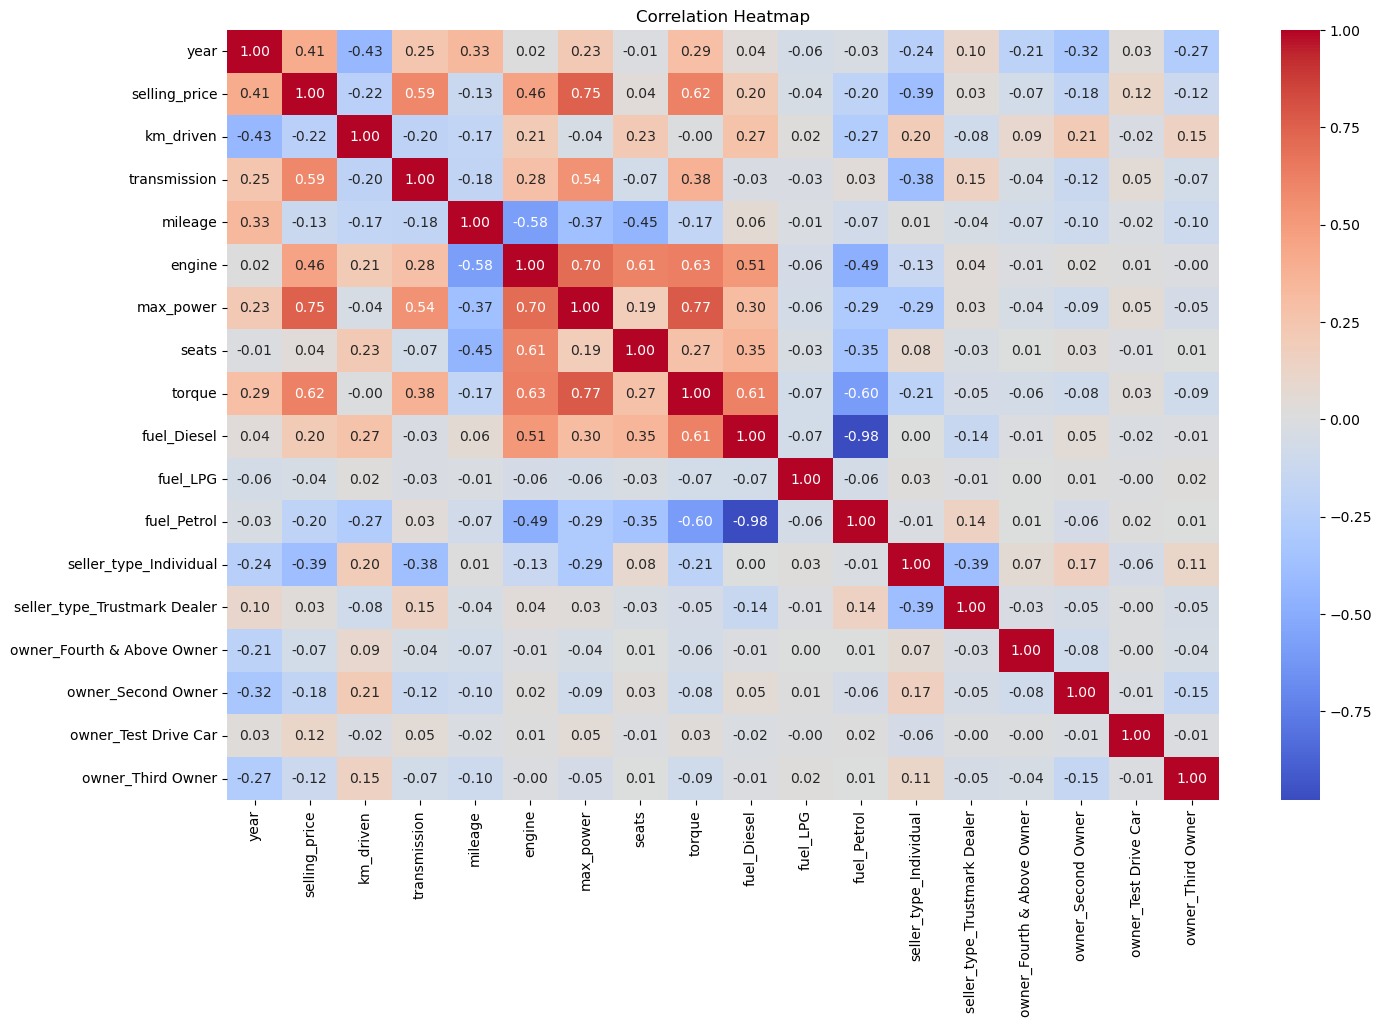

In [15]:
# Save the heatmap to a file
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")  # Saved in current project folder
plt.show()
